In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

# load data

In [2]:
# efficiency
df_efficiency=pd.read_csv('preprocessing/efficiency/efficiency_index.csv', index_col=0)
df_efficiency.columns=df_efficiency.columns.astype(int)

f = open('preprocessing/efficiency/efficiency.pickle', 'rb')
dict_eff_model_params, dict_eff_model_cov, dict_eff_error = pickle.load(f)
f.close()

# HDD
f1=open('preprocessing/HDD/HDD_misc.pickle', 'rb')
countries, df_gas_threshold, df_theta, df_HDD_error = pickle.load(f1)
f1.close()

f2=open('preprocessing/HDD/HDD_values.pickle', 'rb')
dict_dfs_daily_HDD, df_annual_HDD_baseline = pickle.load(f2)
f2.close()

f3=open('preprocessing/HDD/clustering.pickle', 'rb')
df_cluster_summary, df_cluster_cardinality, df_representative_year, df_representative_year_HDD, dict_window_start=pickle.load(f3)
f3.close()


In [3]:
# remove NO from gas model
countries=[country for country in countries if country!='NO']
print(countries)
print(len(countries))

['AT', 'BE', 'BG', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LV', 'NL', 'PL', 'RO', 'SI', 'SK', 'FI', 'SE', 'LU', 'PT', 'CH', 'UA']
28


In [4]:
# population 
df_pop1=pd.read_csv('raw_data/Eurostat/population_1990to2021.csv', index_col=0)
df_pop2=pd.read_csv('raw_data/Eurostat/population_2011to2022.csv', index_col=0)
df_pop=pd.concat([df_pop1.loc[countries], df_pop2.loc[countries, '2022']], axis=1)
# shift pop by on year (eurostat takes jan 1 --> shift to dec 31 the prev year)
df_pop=df_pop.rename(dict(zip(df_pop.columns, [int(year)-1 for year in df_pop.columns])), axis=1)
df_pop=df_pop.astype(float)
df_pop

,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
TIME,,,,,,,,,,,,,,,,,,,,,
AT,7644818.0,7710882.0,7798899.0,7882519.0,7928746.0,7943489.0,7953067.0,7964966.0,7971116.0,7982461.0,...,8451860.0,8507786.0,8584926.0,8700471.0,8772865.0,8822267.0,8858775.0,8901064.0,8932664.0,8978929.0
BE,9947782.0,9986975.0,10021997.0,10068319.0,10100631.0,10130574.0,10143047.0,10170226.0,10192264.0,10213752.0,...,11137974.0,11180840.0,11237274.0,11311117.0,11351727.0,11398589.0,11455519.0,11522440.0,11554767.0,11631136.0
BG,8767308.0,8669269.0,8595465.0,8484863.0,8459763.0,8427418.0,8384715.0,8340936.0,8283200.0,8230371.0,...,7284552.0,7245677.0,7202198.0,7153784.0,7101859.0,7050034.0,7000039.0,6951482.0,6916548.0,6838937.0
CZ,10362102.0,10304607.0,10312548.0,10325697.0,10334013.0,10333161.0,10321344.0,10309137.0,10299125.0,10289621.0,...,10516125.0,10512419.0,10538275.0,10553843.0,10578820.0,10610055.0,10649800.0,10693939.0,10701777.0,10516707.0
DE,62679035.0,79753227.0,80274564.0,80974632.0,81338093.0,81538603.0,81817499.0,82012162.0,82057379.0,82037011.0,...,80523746.0,80767463.0,81197537.0,82175684.0,82521653.0,82792351.0,83019213.0,83166711.0,83155031.0,83237124.0
DK,5135409.0,5146469.0,5162126.0,5180614.0,5196642.0,5215718.0,5251027.0,5275121.0,5294860.0,5313577.0,...,5602628.0,5627235.0,5659715.0,5707251.0,5748769.0,5781190.0,5806081.0,5822763.0,5840045.0,5873420.0
EE,1570599.0,1567749.0,1554878.0,1511303.0,1476952.0,1448075.0,1425192.0,1405996.0,1393074.0,1379237.0,...,1320174.0,1315819.0,1314870.0,1315944.0,1315635.0,1319133.0,1324820.0,1328976.0,1330068.0,1331796.0
ES,38853227.0,38881416.0,39051336.0,39264034.0,39458489.0,39639726.0,39808374.0,39971329.0,40143449.0,40303568.0,...,46727890.0,46512199.0,46449565.0,46440099.0,46528024.0,46658447.0,46937060.0,47332614.0,47398695.0,47432805.0
FR,NaN,58313439.0,58604851.0,58885929.0,59104320.0,59315139.0,59522297.0,59726386.0,59934884.0,60158533.0,...,65600350.0,66165980.0,66458153.0,66638391.0,66809816.0,67026224.0,67177636.0,67320216.0,67656682.0,67842582.0


In [12]:
# JRCIDEES households gas data
df_gas=pd.read_excel('raw_data/JRCIDEES/SpaceHeating_JRCIDEES.xlsx', sheet_name='gas_cons_HH_space_heat',
                     index_col=0) #[ktoe]
# 1 ktoe = 41.78 TJ
df_gas=df_gas*41.78 # TJ
df_gas.columns=df_gas.columns.astype(int)
df_gas

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
ktoe,,,,,,,,,,,,,,,,
GB,942681.360003,974688.619047,963781.327238,995065.203918,1.026174e+06,976947.337984,934425.065808,886974.356009,908617.889301,859318.684081,1.001385e+06,693002.927226,850712.371243,848211.717872,638175.740535,685437.616452
SK,56569.105604,59282.473902,56841.979989,56259.046103,5.107785e+04,47910.735092,42014.194852,34771.381670,37206.398265,37770.047239,4.263990e+04,36137.017071,32705.177533,35127.022842,29349.265168,28995.762588
SI,1810.680148,1892.527869,2114.127897,2711.126205,3.046985e+03,2971.990704,2769.456282,2373.646222,2902.391334,3124.964151,3.348525e+03,3248.358340,3289.574578,3195.891379,2288.140714,2859.480717
SE,3420.905061,4011.389009,2529.161977,2286.606518,2.269602e+03,2327.632897,1830.530933,1744.737587,3534.036360,4456.481422,4.964929e+03,2773.160653,2610.589873,2348.073134,2340.469034,2421.844960
RO,77656.473719,67597.292197,78141.112951,84891.979318,8.723081e+04,70598.966236,78320.657493,61132.452344,69510.292988,67872.078729,6.978798e+04,72934.397416,79882.719366,75412.500286,65552.970472,67372.977712
PT,1756.803397,2097.492447,2518.321255,2610.107191,2.873149e+03,3082.630182,3046.961153,3290.070812,3155.210227,3823.468851,2.887412e+03,2265.849602,2537.909791,2704.690882,2980.983878,3007.516112
PL,97474.660195,104451.798187,97358.834884,95216.011460,9.317572e+04,100224.386843,103793.356543,97362.178940,96343.034533,98891.440895,1.124600e+05,99121.066804,104259.092807,104960.035064,93794.422056,94191.092387
NL,271896.151609,291760.644566,276355.182125,285018.796321,2.687902e+05,254620.573833,254994.455728,217898.754207,257864.547392,256894.617312,3.126251e+05,222836.669694,244601.736757,265021.380363,175825.793784,193109.868958
LV,2166.828990,2479.280698,2679.762218,2979.622736,3.174942e+03,3362.642228,3428.195509,3608.510058,3650.282331,3365.358980,3.984519e+03,3444.448954,3463.283492,3190.357590,3151.200189,2980.301483


In [14]:
# add SFOE data for CH
df_CH=pd.read_csv('raw_data/SFOE/residential_space_heating_gas_demand.csv', index_col=0, skiprows=1)
CH_gas=df_CH.loc[range(2000, 2016), 'residential_gas_heating'].values*1000 # PJ to TJ 
df_gas.loc['CH']=CH_gas # PJ to TJ
df_gas

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
ktoe,,,,,,,,,,,,,,,,
GB,942681.360003,974688.619047,963781.327238,995065.203918,1.026174e+06,976947.337984,934425.065808,886974.356009,908617.889301,859318.684081,1.001385e+06,693002.927226,850712.371243,848211.717872,638175.740535,685437.616452
SK,56569.105604,59282.473902,56841.979989,56259.046103,5.107785e+04,47910.735092,42014.194852,34771.381670,37206.398265,37770.047239,4.263990e+04,36137.017071,32705.177533,35127.022842,29349.265168,28995.762588
SI,1810.680148,1892.527869,2114.127897,2711.126205,3.046985e+03,2971.990704,2769.456282,2373.646222,2902.391334,3124.964151,3.348525e+03,3248.358340,3289.574578,3195.891379,2288.140714,2859.480717
SE,3420.905061,4011.389009,2529.161977,2286.606518,2.269602e+03,2327.632897,1830.530933,1744.737587,3534.036360,4456.481422,4.964929e+03,2773.160653,2610.589873,2348.073134,2340.469034,2421.844960
RO,77656.473719,67597.292197,78141.112951,84891.979318,8.723081e+04,70598.966236,78320.657493,61132.452344,69510.292988,67872.078729,6.978798e+04,72934.397416,79882.719366,75412.500286,65552.970472,67372.977712
PT,1756.803397,2097.492447,2518.321255,2610.107191,2.873149e+03,3082.630182,3046.961153,3290.070812,3155.210227,3823.468851,2.887412e+03,2265.849602,2537.909791,2704.690882,2980.983878,3007.516112
PL,97474.660195,104451.798187,97358.834884,95216.011460,9.317572e+04,100224.386843,103793.356543,97362.178940,96343.034533,98891.440895,1.124600e+05,99121.066804,104259.092807,104960.035064,93794.422056,94191.092387
NL,271896.151609,291760.644566,276355.182125,285018.796321,2.687902e+05,254620.573833,254994.455728,217898.754207,257864.547392,256894.617312,3.126251e+05,222836.669694,244601.736757,265021.380363,175825.793784,193109.868958
LV,2166.828990,2479.280698,2679.762218,2979.622736,3.174942e+03,3362.642228,3428.195509,3608.510058,3650.282331,3365.358980,3.984519e+03,3444.448954,3463.283492,3190.357590,3151.200189,2980.301483


In [15]:
df_annual_HDD=df_annual_HDD_baseline.T # transpose to match format
df_annual_HDD

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
AT,2892.839050,2636.265930,2600.758398,2497.438358,2665.205201,2836.824154,2697.693629,2823.476021,2520.766415,2302.651268,...,2810.479457,2351.542156,2505.560326,2574.337334,2050.550596,2249.986161,2365.823085,2458.611535,2247.114158,2232.978313
BE,2011.317810,1954.515665,1919.077897,1882.309344,1867.531958,2275.504807,2082.149760,2108.818373,1691.428434,1702.694601,...,2171.075853,1595.132536,1813.175728,1986.408327,1471.272407,1639.104488,1846.438799,1701.631622,1694.736867,1587.367160
BG,2794.381499,2664.683099,2740.134050,2680.472968,2737.139305,2840.277256,2728.151321,2859.465635,2755.593266,2407.719616,...,2433.587292,2696.939310,2645.925425,2330.386811,2202.369498,2433.903058,2384.230572,2523.026840,2340.930942,2126.906415
CZ,2986.066674,2755.249091,2653.087120,2509.478682,2667.991524,2983.545118,2727.154859,2968.311869,2540.233329,2321.240960,...,2969.688204,2440.867942,2591.628734,2622.694945,2032.062055,2228.079510,2406.554243,2486.430468,2256.151215,2183.827405
DE,2344.847410,2232.323489,2112.776851,2065.105083,2148.172232,2446.864992,2226.258365,2409.254167,1930.667530,1843.356326,...,2455.591898,1855.488391,2012.031465,2134.967474,1597.201119,1764.523367,1968.723739,1893.296000,1797.313670,1751.967503
DK,2568.368114,2560.784260,2376.582923,2217.411350,2276.164069,2734.647472,2523.369553,2592.377028,2236.076344,1971.233570,...,2762.429719,2155.206271,2291.549522,2325.337876,1838.684936,1900.490955,2194.662880,2041.719483,2159.302116,1889.872730
EE,2588.531070,2440.934547,2300.387182,2214.491634,2359.774730,2900.025208,2549.022737,2851.202464,2445.900424,1835.569968,...,2823.810237,2177.781529,2486.968392,2302.930623,2087.954592,1770.125968,2221.592812,2055.048757,2226.841801,1907.153855
ES,1318.202086,1138.212553,1208.439243,1159.488418,1326.750793,1316.673720,1265.443599,1194.708309,1207.305040,1034.001586,...,1354.645378,1162.750263,1266.142081,1282.872299,1129.669301,1119.896278,1117.165409,1165.526885,1194.617045,1097.626298
FR,2213.352464,2065.016430,1977.583874,2087.799894,2130.301903,2331.080961,2195.846735,2215.828164,1849.762181,1805.636247,...,2326.224965,1656.557956,1969.295931,2127.129432,1621.293340,1789.811118,1904.613761,1860.970033,1777.175077,1775.995142
GB,1740.840433,1791.465968,1651.493969,1653.034719,1673.927795,1872.366303,1855.195754,1802.546034,1567.770786,1498.567015,...,1924.155309,1336.677836,1589.338415,1740.852614,1313.235242,1379.534810,1585.086367,1437.541458,1544.606951,1460.488531


In [16]:
df_eff_idx = pd.read_csv('preprocessing/efficiency/efficiency_index.csv', index_col=0)
df_eff_idx.columns=df_eff_idx.columns.astype(int)
df_eff_idx

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
AT,1.308544,1.247721,1.198730,1.159269,1.127484,1.101882,1.081260,1.064649,1.051270,1.040493,...,1.014652,1.010998,1.008055,1.005684,1.003775,1.002237,1.000998,1.0,0.999196,0.998549
BG,1.057444,1.052854,1.048507,1.044391,1.040494,1.036803,1.033308,1.029998,1.026863,1.023895,...,1.013516,1.011255,1.009115,1.007088,1.005169,1.003351,1.001630,1.0,0.998457,0.996995
HR,1.379935,1.366512,1.352619,1.338237,1.323352,1.307944,1.291995,1.275486,1.258399,1.240712,...,1.163535,1.142519,1.120766,1.098249,1.074943,1.050818,1.025847,1.0,0.973246,0.945553
CY,2.119621,1.926215,1.765383,1.631639,1.520420,1.427933,1.351023,1.287067,1.233882,1.189654,...,1.075709,1.058122,1.043496,1.031334,1.021220,1.012810,1.005816,1.0,0.995164,0.991142
CZ,1.329137,1.293687,1.261502,1.232283,1.205754,1.181670,1.159804,1.139952,1.121929,1.105566,...,1.053862,1.043769,1.034606,1.026287,1.018734,1.011877,1.005652,1.0,0.994869,0.990210
DK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.199860,1.135769,1.092090,...,1.018786,1.012365,1.007988,1.005006,1.002973,1.001588,1.000643,1.0,0.999561,0.999263
EE,1.221450,1.207881,1.194611,1.181633,1.168941,1.156528,1.144389,1.132517,1.120907,1.109552,...,1.066579,1.056420,1.046486,1.036770,1.027268,1.017976,1.008888,1.0,0.991308,0.982807
FI,1.247889,1.246562,1.244970,1.243060,1.240767,1.238015,1.234713,1.230751,1.225995,1.220288,...,1.183519,1.169314,1.152266,1.131808,1.107256,1.077792,1.042433,1.0,0.949077,0.887965
FR,1.539391,1.492545,1.448670,1.407578,1.369093,1.333049,1.299292,1.267675,1.238064,1.210332,...,1.115912,1.095927,1.077211,1.059682,1.043264,1.027888,1.013487,1.0,0.987368,0.975538
DE,1.636672,1.562982,1.496838,1.437468,1.384177,1.336343,1.293408,1.254869,1.220277,1.189228,...,1.093733,1.075642,1.059403,1.044828,1.031745,1.020002,1.009461,1.0,0.991508,0.983885


In [18]:
# gas use in TJ per capita, adjusted to 2020 efficiency

# select overlapping years
years=list(set.intersection(set(df_eff_idx.columns), set(df_pop.columns), set(df_gas.columns)))
years.sort()

# select overlapping countries
countries=[country for country in countries if country in df_gas.index]

# base year is 2020
df_gas_capita_20=pd.DataFrame(index=countries, columns=years, data=
    np.divide(np.divide(df_gas.loc[countries, years].values, 
                        df_pop.loc[countries, years].values), 
              df_eff_idx.loc[countries, years].values))
df_gas_capita_20

,2000,2001,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
AT,3.686543e-03,0.004341,0.004522,0.004454,0.004200,0.003976,0.003761,0.003849,0.003977,0.004634,0.003977,0.004139,0.004739,0.003741,0.004150
BE,7.793196e-03,0.008756,0.008913,0.009504,0.009459,0.008627,0.008058,0.008358,0.008284,0.010295,0.007656,0.008376,0.009746,0.007166,0.008274
BG,5.849709e-07,0.000002,0.000010,0.000019,0.000045,0.000079,0.000100,0.000121,0.000158,0.000161,0.000191,0.000181,0.000147,0.000143,0.000163
CZ,5.111461e-03,0.006221,0.006464,0.006418,0.006333,0.006360,0.005644,0.005663,0.005722,0.006846,0.005659,0.005797,0.005908,0.004657,0.005170
DE,5.900708e-03,0.006595,0.007085,0.007093,0.007093,0.007151,0.006551,0.007329,0.007357,0.008515,0.006932,0.007800,0.008391,0.006589,0.007232
DK,NaN,NaN,NaN,NaN,NaN,NaN,0.003108,0.003227,0.003358,0.004187,0.003568,0.003591,0.003596,0.003040,0.003277
EE,7.831369e-04,0.000794,0.000719,0.000752,0.000883,0.000906,0.001000,0.001004,0.001047,0.001171,0.001086,0.001198,0.001144,0.001141,0.001074
ES,8.230735e-04,0.000945,0.001250,0.001294,0.001362,0.001555,0.001570,0.001462,0.001504,0.001819,0.001365,0.001415,0.001272,0.001245,0.001265
FR,4.415326e-03,0.004662,0.004917,0.005663,0.005616,0.005717,0.004991,0.005597,0.005704,0.005678,0.004457,0.005090,0.005183,0.003855,0.004041
GB,NaN,NaN,0.010333,0.011085,0.010942,0.010820,0.010585,0.011154,0.010826,0.012910,0.009128,0.011437,0.011610,0.008869,0.009651


[3.18920016]


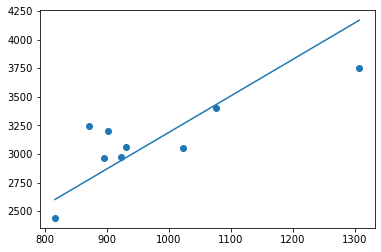

[2.99204644 3.29156344 2.98195089 2.87236342 3.30864065 3.73055161
 3.1636477  3.22492952 3.55076185]


In [19]:
# try linear model with y-intercept=0

def func_linear(x,k):
    return x*k

from scipy.optimize import curve_fit

country='IE'
model_years=[year for year in df_annual_HDD.columns if year in  df_gas_capita_20.loc[country].dropna().index]
v_gas=df_gas_capita_20.loc[country, model_years]*1000000 # TJ to MJ 
v_HDD=df_annual_HDD.loc[country, model_years]

# linear model
popt, pcov = curve_fit(func_linear, v_HDD , v_gas, bounds=(0, np.inf))
print(popt)

plt.plot(np.sort(v_HDD), func_linear(np.sort(v_HDD), *popt))

plt.scatter(v_HDD, v_gas)
plt.show()
print(v_gas.values/v_HDD.values)

In [20]:
# compute gas use in MJ per capita per HDD, adjusted to 2020 efficiency

import statsmodels.api as sm

dict_constants={}
dict_L_error={}
dict_nsamples={}
for country in countries:
    model_years=[year for year in df_annual_HDD.columns if year in  df_gas_capita_20.loc[country].dropna().index]
    v_gas=df_gas_capita_20.loc[country,  model_years]*1000000 # TJ to MJ 
    v_HDD=df_annual_HDD.loc[country, model_years]
    
    dict_nsamples[country]=len(model_years)
    
    # scipy linear model
    # popt, pcov = curve_fit(func_linear, v_HDD , v_gas, bounds=(0, np.inf))
    # dict_constants[country]=popt[0]
    # dict_error[country]=pcov[0][0]
    
    # statsmodel 
    model = sm.OLS(endog=v_gas.values, exog=v_HDD.values).fit()
    dict_constants[country]=model.params[0]
    dict_L_error[country]=model.bse[0] # standard error of coefficient L

s_constants=pd.Series(data=dict_constants)
s_constants

AT    1.672015
BE    4.860603
BG    0.039876
CZ    2.342229
DE    3.649395
DK    1.590610
EE    0.432785
ES    1.094302
FR    2.615409
GB    7.062611
GR    0.601073
HR    1.106745
HU    3.455622
IE    3.189200
IT    6.375278
LT    0.435149
LV    0.451559
NL    6.996695
PL    0.769566
RO    1.472049
SI    0.485236
SK    2.591856
FI    0.043969
SE    0.079346
LU    5.770919
PT    0.329938
CH    1.466484
dtype: float64

In [21]:
# check 
dict_L_error

{'AT': 0.024157700446306263,
 'BE': 0.06659047062235265,
 'BG': 0.007449554669783642,
 'CZ': 0.019251314952954464,
 'DE': 0.06831456094246914,
 'DK': 0.023037956934357385,
 'EE': 0.022762132274181984,
 'ES': 0.048299762127454404,
 'FR': 0.05978686047208057,
 'GB': 0.10603276597689103,
 'GR': 0.05024119203950352,
 'HR': 0.02646814777729118,
 'HU': 0.09585914528471438,
 'IE': 0.09249042403992552,
 'IT': 0.08325831065197813,
 'LT': 0.010008535460143695,
 'LV': 0.030770194127245715,
 'NL': 0.07131936417837252,
 'PL': 0.018559765933986155,
 'RO': 0.05561985802433367,
 'SI': 0.018342492425927927,
 'SK': 0.042098915009999356,
 'FI': 0.0019245449077989858,
 'SE': 0.005969591708812505,
 'LU': 0.21298411140986206,
 'PT': 0.019586737424201365,
 'CH': 0.05325793259869865}

In [22]:
dict_nsamples

{'AT': 15,
 'BE': 15,
 'BG': 15,
 'CZ': 15,
 'DE': 15,
 'DK': 9,
 'EE': 15,
 'ES': 15,
 'FR': 15,
 'GB': 13,
 'GR': 6,
 'HR': 15,
 'HU': 6,
 'IE': 9,
 'IT': 8,
 'LT': 8,
 'LV': 15,
 'NL': 15,
 'PL': 15,
 'RO': 15,
 'SI': 9,
 'SK': 15,
 'FI': 15,
 'SE': 15,
 'LU': 8,
 'PT': 13,
 'CH': 15}

In [23]:
df_L_summary=pd.DataFrame(index=countries, columns=['n_points', 'L', 'std_err'], data=
                         np.concatenate([np.array([int(v) for v in dict_nsamples.values()]).reshape(-1,1) ,
                            np.array([float(v) for v in dict_constants.values()]).reshape(-1,1),
                            np.array([float(v) for v in dict_L_error.values()]).reshape(-1,1)
                           ], axis=1))
df_L_summary

,n_points,L,std_err
AT,15.0,1.672015,0.024158
BE,15.0,4.860603,0.066590
BG,15.0,0.039876,0.007450
CZ,15.0,2.342229,0.019251
DE,15.0,3.649395,0.068315
DK,9.0,1.590610,0.023038
EE,15.0,0.432785,0.022762
ES,15.0,1.094302,0.048300
FR,15.0,2.615409,0.059787
GB,13.0,7.062611,0.106033


In [24]:
# projected population at on jan 1, 2023
pop_22=df_pop[2021]*2-df_pop[2020]
pop_22

TIME
AT     9025194.0
BE    11707505.0
BG     6761326.0
CZ    10331637.0
DE    83319217.0
DK     5906795.0
EE     1333524.0
ES    47466915.0
FR    68028482.0
GB    67736833.0
GR    10528988.0
HR     3721793.0
HU     9647248.0
IE     5113686.0
IT    58730031.0
LT     2816316.0
LV     1858291.0
NL    17705929.0
PL    37468493.0
RO    18874534.0
SI     2105383.0
SK     5409643.0
FI     5562689.0
SE    10525357.0
LU      656064.0
PT    10405832.0
CH     8802720.0
UA    40576679.0
dtype: float64

# convert to cubic meter

In [27]:
#dict_dfs_annual_HDD=dict()
dict_dfs_annual_gas=dict()
dict_dfs_annual_gas_std=dict()

for scenario in df_representative_year.columns:
    #dict_dfs_annual_HDD[scenario]=pd.DataFrame(index=countries, columns=np.arange(-5, 5.5, 0.5))
    dict_dfs_annual_gas[scenario]=pd.DataFrame(index=countries, columns=np.arange(-5, 5.5, 0.5))
    dict_dfs_annual_gas_std[scenario]=pd.DataFrame(index=countries, columns=np.arange(-5, 5.5, 0.5))

for country in countries:    
#for country in ['GB']:

    # country params
    rep_years=df_representative_year.loc[country].unique()

    df_daily_HDD=dict_dfs_daily_HDD[country]

    _pop=pop_22.loc[country]
    _L=s_constants[country]
    _eff=df_eff_idx.loc[country, 2022]

    # uncertainty params
    dHDD=df_HDD_error.loc[country, 'annual_deviation']
    dL=dict_L_error[country]
    deta=dict_eff_error[country]


    with pd.ExcelWriter('output/JRC/JRC_HH_daily_gas/%s_daily_gas_demand.xlsx' %country) as writer: 
        for year in rep_years:

            # scenario(s) in which the year is the representative
            rep_scearios= (df_representative_year.columns)[df_representative_year.loc[country]==year].to_list()

            # daily HDD
            _df_daily_HDD=df_daily_HDD.loc[df_daily_HDD.index.year==year]
            # daily gas
            df_daily_gas=_df_daily_HDD*_L*_pop*_eff/37/1000000 # MJ to million cubic meter, 1 cm = 37 MJ

            # sum to annual HDD
            v_annual_HDD=_df_daily_HDD.sum().values
            # sum to annual gas demand 
            v_annual_gas=df_daily_gas.sum().values
            
            # uncertainty
            v_annual_gas_std=np.array([np.sqrt((_pop*hdd*dL*_eff)**2 + (_pop*_L* dHDD*_eff)**2 +
                          (_pop*_L* hdd * deta)**2)   for hdd in v_annual_HDD])/37/1000000

            for scenario in rep_scearios:
                # save to annual dicts
                #dict_dfs_annual_HDD[scenario].loc[country]=v_annual_HDD
                dict_dfs_annual_gas[scenario].loc[country]=v_annual_gas
                dict_dfs_annual_gas_std[scenario].loc[country]=v_annual_gas_std

                # save to excel
                df_daily_gas.to_excel(writer, sheet_name=scenario)

        # close excel file
        writer.save()
    
    print(country)

        
        
    


AT
BE
BG
CZ
DE
DK
EE
ES
FR
GB
GR
HR
HU
IE
IT
LT
LV
NL
PL
RO
SI
SK
FI
SE
LU
PT
CH


In [28]:
dict_dfs_annual_gas['normal']

,-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,...,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
AT,611.514516,652.356327,694.035351,736.423665,779.638177,823.807335,868.980735,915.277288,962.421264,1010.398035,...,1108.565857,1158.564083,1209.144165,1260.240158,1311.812385,1363.816176,1416.147892,1468.845352,1521.851745,1575.140145
BE,1296.976446,1431.08643,1570.143671,1712.856261,1858.711593,2007.283685,2158.110583,2310.743541,2464.931876,2620.358024,...,2933.830478,3091.529341,3249.748826,3408.370765,3567.388279,3726.667447,3885.972456,4045.277466,4204.582475,4363.887484
BG,10.701126,11.351375,12.010261,12.677372,13.352707,14.035938,14.725639,15.422417,16.12634,16.838543,...,18.286414,19.02049,19.761371,20.506868,21.255595,22.008028,22.763383,23.521882,24.282848,25.04549
CZ,988.510179,1051.735422,1116.5731,1183.387544,1252.203789,1322.688308,1394.781588,1468.566267,1543.877281,1620.522303,...,1777.835544,1858.243113,1939.629753,2021.915773,2105.053994,2188.96592,2273.709488,2359.18204,2445.200262,2531.665672
DE,7631.317288,8353.708705,9099.276474,9863.333515,10645.739567,11447.428538,12270.943141,13111.135929,13964.618477,14831.82498,...,16607.818548,17517.222835,18438.158972,19370.321035,20312.058193,21261.891125,22217.098454,23178.074027,24143.677569,25113.643933
DK,308.153174,332.785046,357.700618,382.932112,408.461876,434.268518,460.293152,486.482618,512.840821,539.350892,...,592.712449,619.489972,646.31255,673.183672,700.074822,726.97155,753.868278,780.765006,807.661733,834.558461
EE,22.069897,23.492618,24.938485,26.411035,27.906017,29.422266,30.962058,32.521884,34.097218,35.683393,...,38.8788,40.484839,42.092484,43.701778,45.312548,46.925515,48.539516,50.154834,51.772147,53.390302
ES,698.127734,773.671052,852.537319,934.252536,1018.583988,1105.447959,1194.311352,1284.697612,1376.097902,1468.353196,...,1655.454479,1750.417599,1846.203546,1942.650016,2039.731711,2137.171033,2234.991011,2333.056064,2431.251408,2529.470868
FR,4251.956733,4688.267598,5141.875935,5610.618803,6094.708394,6594.176127,7107.320153,7632.833063,8170.545158,8719.156527,...,9844.0674,10418.611246,11000.661721,11589.14445,12183.209192,12781.998927,13385.94303,13995.217482,14609.029852,15227.54776
GB,7890.130817,8928.816515,10025.346568,11178.183573,12381.202093,13618.321318,14875.919825,16151.840574,17443.293716,18746.699554,...,21382.170505,22710.92113,24044.411396,25381.893051,26720.6862,28061.764561,29404.577555,30748.124781,32092.329674,33436.535691


In [29]:
dict_dfs_annual_gas_std['normal']

,-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,...,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
AT,16.036978,17.0556,18.098049,19.160792,20.246482,21.358132,22.496815,23.665388,24.856762,26.070442,...,28.557106,29.825012,31.108488,32.405787,33.715838,35.037449,36.367931,37.708201,39.056771,40.41292
BE,33.247114,36.438958,39.768376,43.201465,46.72334,50.321642,53.983499,57.696634,61.453821,65.246399,...,72.908133,76.767643,80.642679,84.529986,88.429094,92.336464,96.246091,100.157152,104.069485,107.982951
BG,2.054509,2.179265,2.305682,2.433682,2.563263,2.694362,2.826705,2.960409,3.095485,3.232153,...,3.509995,3.650864,3.79304,3.936104,4.079788,4.224184,4.369142,4.514704,4.66074,4.807098
CZ,32.128808,34.179153,36.282051,38.449294,40.681677,42.968362,45.307402,47.701465,50.145183,52.632305,...,57.737404,60.346906,62.988258,65.658867,68.357196,71.080691,73.831229,76.605473,79.39747,82.204019
DE,369.982303,404.144914,439.470534,475.727085,512.899718,551.026476,590.223479,630.24174,670.916279,712.264784,...,796.993921,840.400382,884.368708,928.883055,973.863519,1019.238499,1064.877144,1110.797531,1156.944531,1203.304916
DK,8.967912,9.681222,10.402985,11.134095,11.874011,12.622089,13.376602,14.135994,14.900364,15.669211,...,17.21699,17.993763,18.771885,19.551454,20.331637,21.112011,21.892413,22.672838,23.453285,24.233751
EE,1.504814,1.601262,1.69931,1.799195,1.900625,2.003519,2.108029,2.213914,2.320867,2.428568,...,2.645568,2.754647,2.863843,2.973158,3.082579,3.192156,3.301807,3.411553,3.521438,3.631384
ES,101.351271,105.745544,110.597757,115.874636,121.551938,127.612741,134.006432,140.683018,147.588178,154.693661,...,169.451977,177.091074,184.88107,192.800328,200.839242,208.968013,217.182431,225.465707,233.803276,242.181753
FR,142.241322,152.031326,162.501718,173.5779,185.241217,197.471768,210.20901,223.40289,237.033596,251.054528,...,280.091158,295.041138,310.253167,325.692015,341.329062,357.136194,373.119971,389.281026,405.594829,422.062756
GB,283.249742,320.334705,359.506255,400.705966,443.712222,487.947869,532.923872,578.561525,624.759861,671.389914,...,765.684925,813.230287,860.94721,908.808627,956.718398,1004.711169,1052.767076,1100.850179,1148.957625,1197.065821


In [30]:
df_daily_gas

,10.0,10.5,11.0,11.5,12.0,12.5,13.0,13.5,14.0,14.5,...,15.5,16.0,16.5,17.0,17.5,18.0,18.5,19.0,19.5,20.0
2012-01-01,2.196338,2.362417,2.528497,2.694576,2.860655,3.026735,3.192814,3.358893,3.524973,3.691052,...,4.023211,4.189290,4.355370,4.521449,4.687528,4.853608,5.019687,5.185766,5.351846,5.517925
2012-01-02,2.619416,2.785495,2.951574,3.117654,3.283733,3.449812,3.615892,3.781971,3.948050,4.114130,...,4.446288,4.612368,4.778447,4.944526,5.110606,5.276685,5.442765,5.608844,5.774923,5.941003
2012-01-03,3.046863,3.212942,3.379022,3.545101,3.711180,3.877260,4.043339,4.209418,4.375498,4.541577,...,4.873736,5.039815,5.205894,5.371974,5.538053,5.704132,5.870212,6.036291,6.202370,6.368450
2012-01-04,2.921173,3.087252,3.253331,3.419411,3.585490,3.751569,3.917649,4.083728,4.249807,4.415887,...,4.748046,4.914125,5.080204,5.246284,5.412363,5.578442,5.744522,5.910601,6.076680,6.242760
2012-01-05,2.791268,2.957348,3.123427,3.289507,3.455586,3.621665,3.787745,3.953824,4.119903,4.285983,...,4.618141,4.784221,4.950300,5.116379,5.282459,5.448538,5.614617,5.780697,5.946776,6.112855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,2.317718,2.483798,2.649877,2.815956,2.982036,3.148115,3.314195,3.480274,3.646353,3.812433,...,4.144591,4.310671,4.476750,4.642829,4.808909,4.974988,5.141067,5.307147,5.473226,5.639305
2012-12-28,2.804569,2.970648,3.136728,3.302807,3.468886,3.634966,3.801045,3.967124,4.133204,4.299283,...,4.631442,4.797521,4.963600,5.129680,5.295759,5.461839,5.627918,5.793997,5.960077,6.126156
2012-12-29,2.789772,2.955851,3.121931,3.288010,3.454089,3.620169,3.786248,3.952327,4.118407,4.284486,...,4.616645,4.782724,4.948804,5.114883,5.280962,5.447042,5.613121,5.779200,5.945280,6.111359
2012-12-30,2.774137,2.940216,3.106296,3.272375,3.438454,3.604534,3.770613,3.936692,4.102772,4.268851,...,4.601010,4.767089,4.933169,5.099248,5.265327,5.431407,5.597486,5.763565,5.929645,6.095724


In [31]:
# save to excel

# save gas model output in bcm
dicts_to_save=[dict_dfs_annual_gas, dict_dfs_annual_gas_std]

for i in range(2):
    if i==0:
        suffix='households_gas_space_heating_bcm'
    else:
        suffix='households_gas_space_heating_std_bcm'
        
    _dfs=dicts_to_save[i]
        
    with pd.ExcelWriter('output/JRC/annual_%s.xlsx' %suffix) as writer:     
        for scenario, _df in _dfs.items():
            _df=_df/1000 # mcm to bcm
            _df.to_excel(writer, sheet_name=scenario)
        writer.save()


In [36]:
(dict_dfs_annual_gas['normal'][-1.0].sum()-dict_dfs_annual_gas['normal'][0.0].sum())/1000 # mcm to bcm

-9.490024230838172